# Raw Data Exploratory Data Analysis and Cleaning

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
users = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users.csv')

In [4]:
users.describe()

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,RESPID,AGE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,48645.000000,48178.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,...,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,42210.000000,48645.000000,35520.000000,35520.000000
mean,25562.400391,39.277180,49.113570,54.624422,51.284449,37.309125,34.585430,39.333615,33.845330,29.161743,...,55.011029,58.636433,53.665898,46.962657,53.446437,39.664562,35.579258,53.826288,42.232447,41.362631
std,15033.356108,15.955373,27.545252,23.770780,26.487641,23.598351,23.234577,25.744281,25.782182,24.267965,...,25.486398,23.837543,25.389724,26.664165,25.795551,26.061055,25.374290,25.891354,25.680349,26.455730
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12161.000000,NaN,28.000000,44.000000,31.000000,14.000000,12.000000,14.000000,10.000000,9.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,NaN,35.000000,NaN,NaN
50%,26605.000000,NaN,51.000000,53.000000,52.000000,34.000000,32.000000,35.000000,30.000000,23.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,NaN,56.000000,NaN,NaN
75%,38766.000000,NaN,70.000000,71.000000,71.000000,52.000000,51.000000,53.000000,52.000000,49.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,NaN,71.000000,NaN,NaN
max,50927.000000,94.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Basic respondent information
**Age** --
Mean age is 39.28 years. Youngest is 13, oldest is 94.

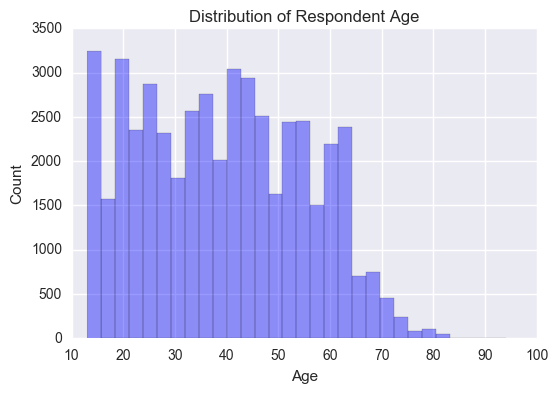

In [5]:
plt.title('Distribution of Respondent Age')
sns.distplot(users['AGE'].dropna(),bins=30, kde=False, color='b')
plt.xlabel('Age')
plt.ylabel('Count')

## Notes for analysis
**Normalizing data**

Questions 1-19 can be normalized by dividing by 100, since max is 100 and min is 0 for all responses.

In [6]:
userkey = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/UserKey.csv',usecols=[0,1],header=None)

In [7]:
userkey_list = userkey.values.tolist()
new_cols = []
counter = 0
for i in userkey_list:
    if counter >= 7:
        new_cols.append(i[1])
    else:
        new_cols.append(i[0])
    counter += 1

In [8]:
new_cols

['RESPID',
 'GENDER',
 'AGE',
 'WORKING',
 'REGION',
 'MUSIC',
 'LIST_OWN',
 'Listening to music that may be on in the background (e.g. the radio or a streaming service like last.fm) -',
 'I enjoy actively searching for and discovering music that I have never heard before (Thinking now about music',
 'I find it easy to find new music (Thinking now about music',
 'I am constantly interested in and looking for more music (Thinking now about music',
 'I would like to buy new music but I don\x89\xdb\xaat know what to buy (Thinking now about music',
 'I used to know where to find music',
 'I am not willing to pay for music (Thinking now about music',
 'I enjoy music primarily from going out to dance (Thinking now about music',
 'Music for me is all about nightlife and going out (Thinking now about music',
 'I am out of touch with new music (Thinking now about music',
 'My music collection is a source of pride (Thinking now about music',
 'Pop music is fun',
 'Pop music helps me to escape (T

In [9]:
users_w_headers = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users_clean.csv')

In [10]:
users_w_headers.ix[:,1:].head(2)

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1.0,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1.0,1.0,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0


In [11]:
users_w_headers.ix[:,1:].columns = new_cols
users_w_headers = users_w_headers.drop('Unnamed: 0',axis=1)

In [12]:
users_w_headers.head(3)

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1.0,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1.0,1.0,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1.0,0.0,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0


In [13]:
user_histplot = users.loc[:,['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10',
                             'Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19']]

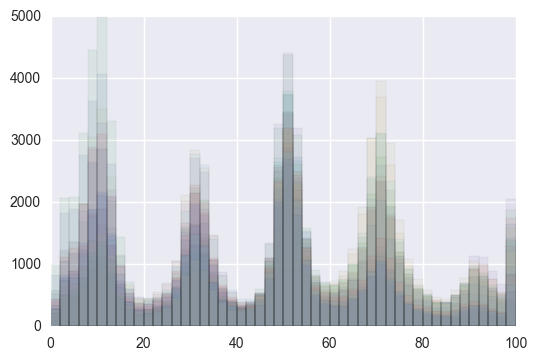

In [14]:
for i in user_histplot:
    users[i].hist(bins=50,alpha=0.1)

In [15]:
userkey

,0,1
0,RESPID,User id
1,GENDER,Male/Female
2,AGE,Age in years
3,WORKING,Working status
4,REGION,Region of the UK
5,MUSIC,Listening to music that you have chosen / boug...
6,LIST_OWN,Listening to music that may be on in the backg...
7,LIST_BACK,Listening to music that may be on in the backg...
8,Q1,I enjoy actively searching for and discovering...
9,Q2,I find it easy to find new music (Thinking now...


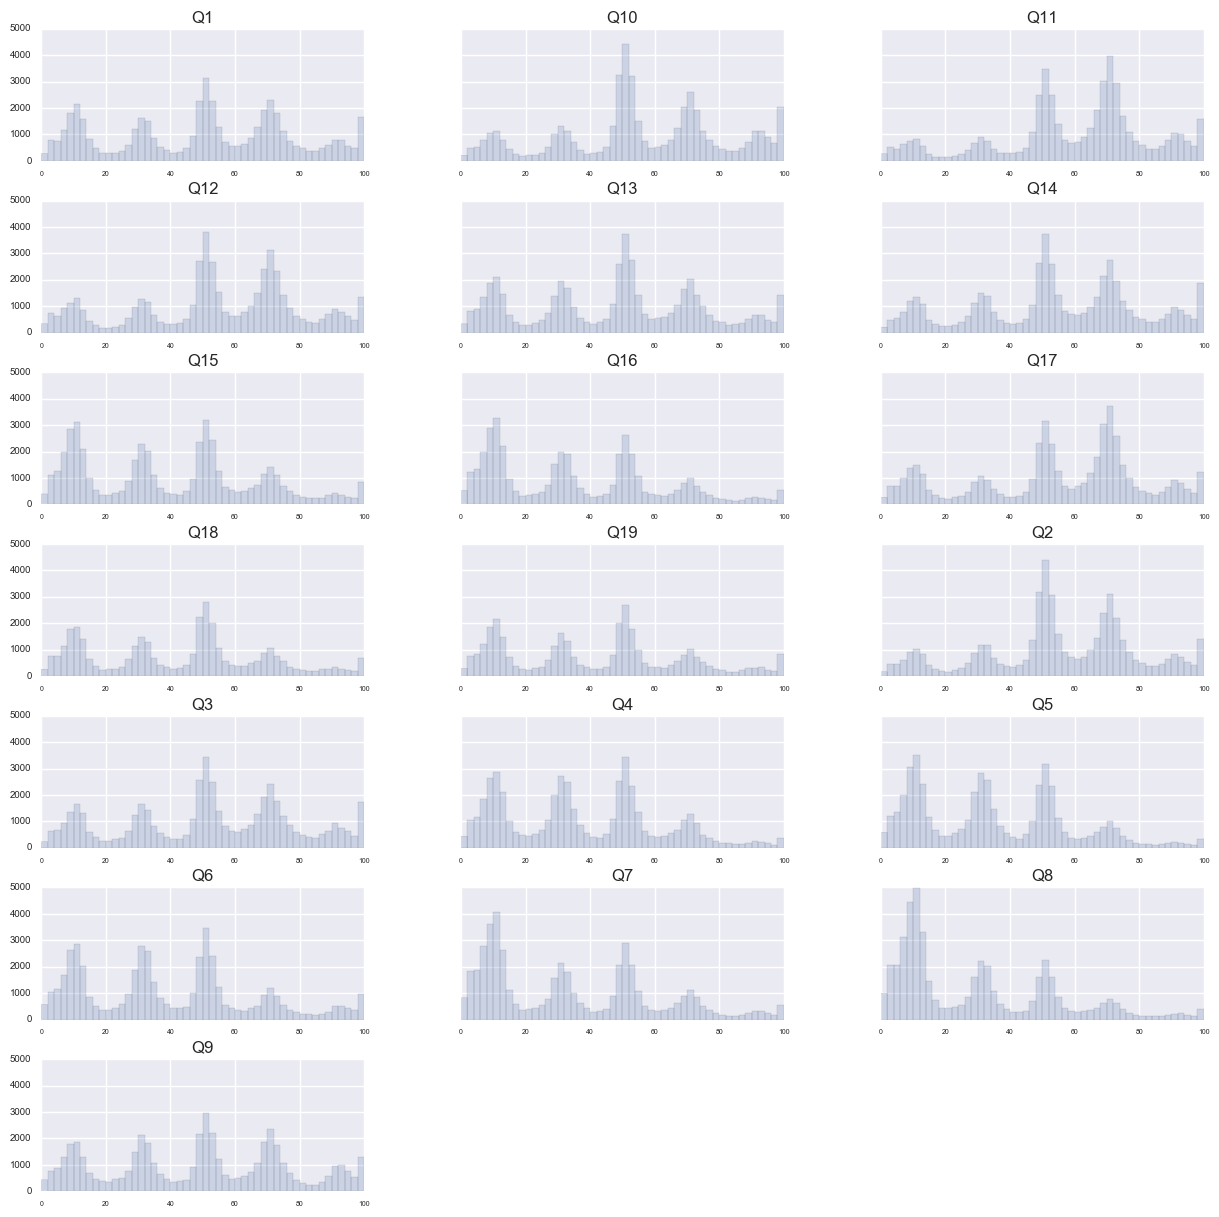

In [16]:
user_histplot.hist(xlabelsize=5,ylabelsize=7,bins=50, layout=(7,3),figsize=(15,15),sharey=True,alpha=0.2);


### In general, there are peaks around 10/15, 30, 50, and 70 across answers to all questions.

In [17]:
print users['GENDER'].value_counts()
print users['AGE'].value_counts()

Female    24503
Male      24142
Name: GENDER, dtype: int64
24.0    1403
23.0    1234
14.0    1156
22.0    1119
21.0    1110
44.0    1090
15.0    1087
20.0    1042
41.0    1027
39.0    1018
40.0    1013
42.0    1004
19.0    1003
13.0    1000
43.0     997
38.0     991
32.0     965
37.0     956
35.0     920
30.0     908
18.0     905
31.0     898
36.0     888
47.0     872
45.0     851
54.0     848
46.0     845
52.0     844
55.0     838
64.0     837
        ... 
60.0     732
61.0     723
25.0     717
17.0     400
65.0     361
66.0     343
67.0     285
16.0     268
68.0     248
69.0     217
70.0     177
71.0     157
72.0     122
73.0      89
74.0      81
75.0      71
76.0      50
78.0      39
77.0      38
80.0      32
79.0      31
81.0      24
82.0      17
85.0       5
83.0       4
84.0       4
89.0       1
86.0       1
87.0       1
94.0       1
Name: AGE, dtype: int64


In [18]:
words = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words_categorized.csv')

In [19]:
words.head()

,Unnamed: 0,Artist,User,HEARD_OF,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
0,0,47,45969,Heard of,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1,35,29118,Never heard of,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,2.0,0.0,0.0
2,2,14,31544,Heard of,0.0,0.0,2.0,1.0,0.0,0,0.0,0.0,0.0,0.0,1.0
3,3,23,18085,Never heard of,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,4,23,18084,Never heard of,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


In [20]:
word_counts = words.describe()
word_counts

,Unnamed: 0,Artist,User,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
count,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.000000,118301.00000,118301.000000
mean,59150.000000,22.471771,24637.126482,0.211663,0.524814,0.829173,0.658498,0.113617,0.088740,0.295255,0.446860,0.978783,0.08677,0.181765
std,34150.701435,14.717169,13831.302288,0.504820,1.155744,1.447465,1.075051,0.337610,0.284369,0.565880,0.889524,1.516388,0.29804,0.429457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,29575.000000,10.000000,13160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,59150.000000,22.000000,24242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,88725.000000,35.000000,35577.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000
max,118300.000000,49.000000,50927.000000,3.000000,14.000000,10.000000,8.000000,2.000000,1.000000,3.000000,9.000000,11.000000,2.00000,5.000000


In [21]:
train = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv')

In [22]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [23]:
train.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


In [24]:
words_users = words.join(users_w_headers, on='User',how='inner')

In [25]:
words_users.describe()

,Unnamed: 0,Artist,User,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,...,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,113735.000000,98704.000000,113735.000000,83039.000000,83039.000000
mean,58948.490095,22.085699,23627.500980,0.212740,0.524843,0.834018,0.659296,0.114732,0.088513,0.293876,...,55.011693,58.606700,53.646580,46.931006,53.384955,39.635760,35.556284,53.858802,42.257716,41.355848
std,34079.632845,14.328983,13136.101093,0.506491,1.156801,1.452922,1.075155,0.339278,0.284040,0.566637,...,25.490135,23.889852,25.421432,26.669479,25.815457,26.051663,25.402553,25.881408,25.694386,26.452861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29557.500000,10.000000,12779.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,NaN,35.000000,NaN,NaN
50%,59038.000000,21.000000,23481.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,NaN,56.000000,NaN,NaN
75%,88296.500000,34.000000,33865.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,NaN,71.000000,NaN,NaN
max,118300.000000,49.000000,48644.000000,3.000000,14.000000,10.000000,8.000000,2.000000,1.000000,3.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [26]:
words_users.shape

(113735, 42)

In [27]:
words_users.head(3)

,Unnamed: 0,Artist,User,HEARD_OF,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,0,47,45969,Heard of,0.0,1.0,0.0,0.0,0.0,0,...,30.0,61.0,91.0,10.0,12.0,13.0,NaN,11.0,7.0,18.0
1,1,35,29118,Never heard of,0.0,0.0,0.0,1.0,0.0,0,...,52.0,57.0,21.0,15.0,27.0,11.0,14.0,75.0,18.0,13.0
28601,28601,39,29118,Heard of and listened to music EVER,0.0,0.0,1.0,0.0,0.0,0,...,52.0,57.0,21.0,15.0,27.0,11.0,14.0,75.0,18.0,13.0


In [28]:
float(words_users['User'].nunique())/len(words_users['User'])

0.4277047522750253

In [29]:
print "On average, respondents are reviewing {} artists/songs."\
      .format(float(len(words_users['User']))/words_users['User'].nunique())

On average, respondents are reviewing 2.33806146572 artists/songs.


In [30]:
print words_users['HEARD_OF'].nunique()
print words_users['HEARD_OF'].unique()

7
['Heard of' 'Never heard of' 'Heard of and listened to music EVER'
 'Heard of and listened to music RECENTLY' 'Ever heard of'
 'Ever heard music by' 'Listened to recently' nan]


In [31]:
users.head(2)

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0


In [32]:
users['REGION'].unique()

array(['South', 'Midlands', 'North', 'Centre', nan, 'Northern Ireland',
       'North Ireland'], dtype=object)

In [33]:
def region_cleaner(x):
    if x == 'North Ireland':
        return 'Northern Ireland'
    else:
        return x

In [34]:
users['REGION'] = users['REGION'].apply(region_cleaner)

In [35]:
users['REGION'].unique()

array(['South', 'Midlands', 'North', 'Centre', nan, 'Northern Ireland'], dtype=object)

In [36]:
pd.pivot_table(users, index='REGION', values=['AGE'])

,AGE
REGION,
Centre,39.948709
Midlands,39.636433
North,39.281763
Northern Ireland,38.789062
South,38.817181


In [37]:
questions_by_region = pd.pivot_table(users,index='REGION',values=['Q1','Q2','Q3','Q4','Q5','Q6',
                                            'Q7','Q8','Q9','Q10','Q11',
                                            'Q12','Q13','Q14','Q15','Q16',
                                            'Q17','Q18','Q19'],aggfunc=(np.mean,np.std)).T
questions_by_region

REGION       Centre   Midlands      North  Northern Ireland      South
Q1  mean  49.354884  47.659271  49.261757         51.918192  49.628372
    std   27.113752  27.423501  27.124749         27.913822  28.108335
Q2  mean  54.502460  53.586184  55.050848         54.732260  54.864797
    std   23.531570  23.806331  23.439537         23.792060  24.138618
Q3  mean  52.342235  49.971838  51.435469         52.922007  51.628030
    std   26.278358  26.525948  26.001730         25.984695  27.028842
Q4  mean  37.333099  36.705836  37.442155         38.677663  37.436479
    std   23.482201  23.394976  23.338787         24.008693  24.011092
Q5  mean  34.953268  34.166268  35.041861         35.546130  34.246141
    std   23.403489  22.943161  23.162366         24.366912  23.424831
Q6  mean  39.766339  39.188968  39.198046         40.451411  39.508066
    std   26.045989  25.674455  25.495452         26.699869  26.009996
Q7  mean  31.520028  33.409528  34.170340         36.389570  34.151808
    std   26.095151  25.455884  25.678658         26.778535  25.951591
Q8  mean  27.508082  28.586260  29.840219         31.866196  29.040321
    std   23.798224  23.929615  24.312460         25.934636  24.412381
Q9  mean  48.748067  47.829239  47.942287         46.658688  47.688025
    std   27.225830  27.361854  27.099625         26.965049  27.645725
Q10 mean  55.739986  54.207705  55.278241         56.028501  55.001152
    std   25.813796  25.337672  25.386770         25.620541  25.700008
Q11 mean  59.952214  57.711523  58.913459         60.881588  58.545370
    std   23.673582  23.703721  23.749382         23.495527  24.058792
Q12 mean  55.339775  52.663535  54.155335         55.524212  53.383755
    std   25.445821  25.244402  25.176232         25.270847  25.691726
Q13 mean  45.777934  45.554860  47.720319         49.782811  47.244503
    std   26.586964  26.397191  26.462901         26.734209  27.029861
Q14 mean  53.711174  51.961904  53.903217         55.498357  53.801295
    std   25.447617  25.783075  25.645233         25.279712  26.045004
Q15 mean  39.140548  38.973035  39.965972         41.644190  39.733633
    std   26.038810  25.888528  25.981461         25.839855  26.270311
Q16 mean  31.424807  35.970153  36.252149         36.739295  35.517549
    std   24.444704  25.273930  25.467407         26.011399  25.456356
Q17 mean  54.195011  53.121626  54.330376         56.614002  53.411706
    std   25.632037  25.886854  25.558553         25.793732  26.272896
Q18 mean        NaN  41.105078  42.588226         43.761730  42.828688
    std         NaN  25.389778  25.471719         25.845215  26.137715
Q19 mean        NaN  40.344441  41.684144         43.413574  41.859512
    std         NaN  26.313162  26.091711         27.052442  26.919528

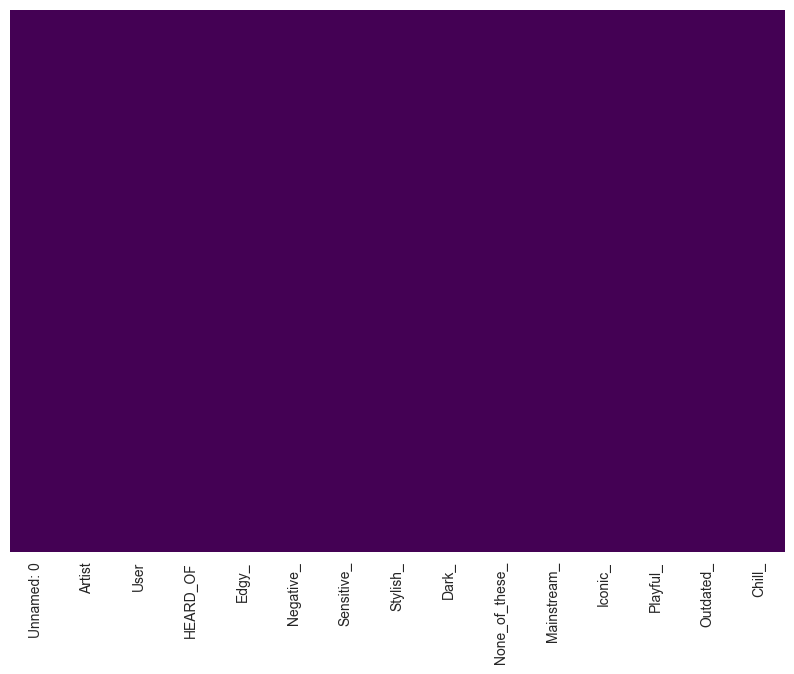

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(words.isnull(),yticklabels=False, cbar=False, cmap='viridis')


In [39]:
print words.columns
print users_w_headers.columns

Index([u'Unnamed: 0', u'Artist', u'User', u'HEARD_OF', u'Edgy_', u'Negative_',
       u'Sensitive_', u'Stylish_', u'Dark_', u'None_of_these_', u'Mainstream_',
       u'Iconic_', u'Playful_', u'Outdated_', u'Chill_'],
      dtype='object')
Index([u'RESPID', u'GENDER', u'AGE', u'WORKING', u'REGION', u'MUSIC',
       u'LIST_OWN', u'LIST_BACK', u'Q1', u'Q2', u'Q3', u'Q4', u'Q5', u'Q6',
       u'Q7', u'Q8', u'Q9', u'Q10', u'Q11', u'Q12', u'Q13', u'Q14', u'Q15',
       u'Q16', u'Q17', u'Q18', u'Q19'],
      dtype='object')


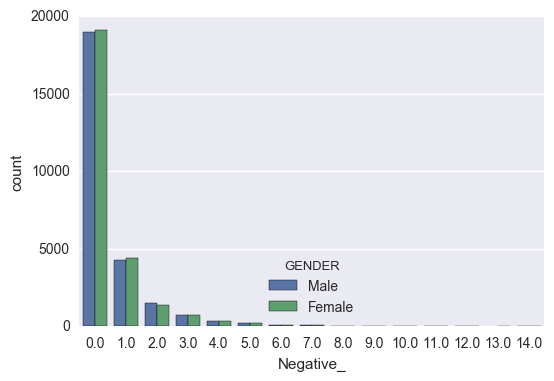

In [40]:
# Graph the number of negative words associated with each artist, per listener gender.
sns.countplot(x='Negative_',hue='GENDER',data=words_users[words_users['AGE']>40])

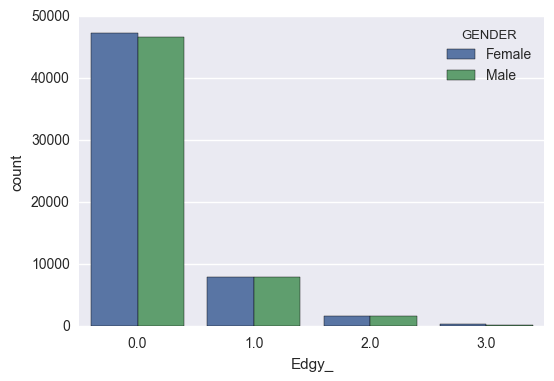

In [41]:
sns.countplot(x='Edgy_',hue='GENDER',data=words_users)

In [42]:
train.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


**The plot below shows that, similar to the listener preferences questions in the 'users' data, ratings tend to peak at intervals of 10, 30, 50, 70, and 90, with smaller peaks towards higher numbers. The most frequent rating is around 30.**

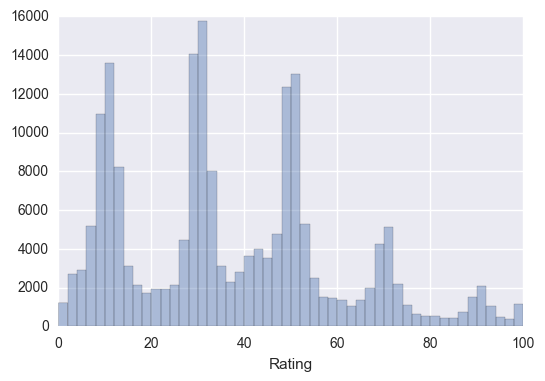

In [43]:
sns.distplot(train['Rating'],kde=False)

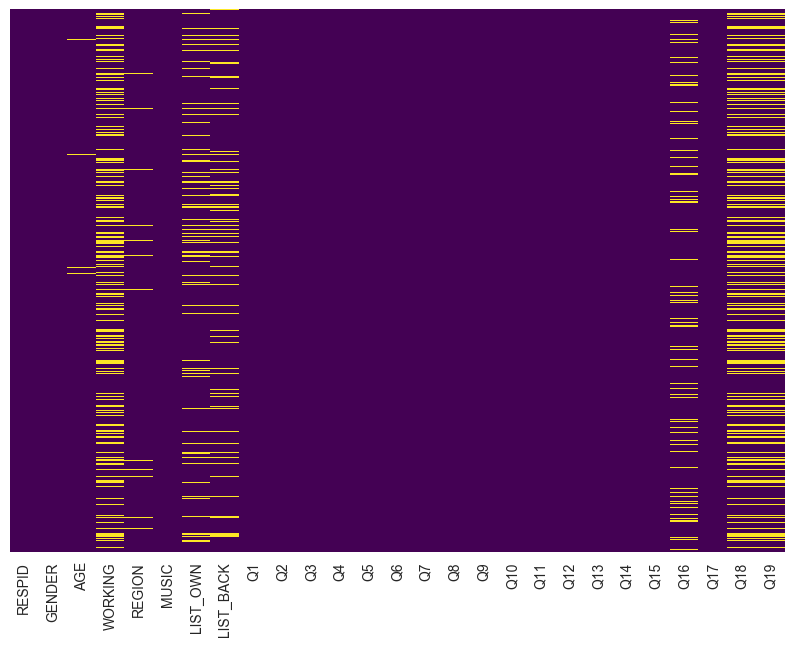

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(users.isnull(),yticklabels=False, cbar=False, cmap='viridis')


## Use the code below to filter out columns with too many null values.

In [45]:
words_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113735 entries, 0 to 118284
Data columns (total 42 columns):
Unnamed: 0        113735 non-null int64
Artist            113735 non-null int64
User              113735 non-null int64
HEARD_OF          113711 non-null object
Edgy_             113735 non-null float64
Negative_         113735 non-null float64
Sensitive_        113735 non-null float64
Stylish_          113735 non-null float64
Dark_             113735 non-null float64
None_of_these_    113735 non-null int64
Mainstream_       113735 non-null float64
Iconic_           113735 non-null float64
Playful_          113735 non-null float64
Outdated_         113735 non-null float64
Chill_            113735 non-null float64
RESPID            113735 non-null int64
GENDER            113735 non-null object
AGE               112643 non-null float64
WORKING           83039 non-null object
REGION            111326 non-null object
MUSIC             113735 non-null object
LIST_OWN          99833

In [46]:
columns = [col for col in words_users
           if len(words_users[col])-pd.isnull(words_users[col]).sum() >=50000]
columns

['Unnamed: 0',
 'Artist',
 'User',
 'HEARD_OF',
 'Edgy_',
 'Negative_',
 'Sensitive_',
 'Stylish_',
 'Dark_',
 'None_of_these_',
 'Mainstream_',
 'Iconic_',
 'Playful_',
 'Outdated_',
 'Chill_',
 'RESPID',
 'GENDER',
 'AGE',
 'WORKING',
 'REGION',
 'MUSIC',
 'LIST_OWN',
 'LIST_BACK',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19']

In [47]:
# It appears that if users do not answer Question 18, they also do not answer Question 19.
print 'Q18=Q19? - {}'.format(len(users['Q19'])-sum(pd.isnull(users['Q19']))==\
                             len(users['Q18'])-sum(pd.isnull(users['Q18'])))
print 'Missing values: {}'.format(len(users['Q19'])-sum(pd.isnull(users['Q19'])))

Q18=Q19? - True
Missing values: 35520


In [48]:
print 'Length of training dataset: {}'.format(len(train))
print 'Length of users dataset: {}'.format(len(users))
print 'Length of words dataset: {}'.format(len(words))


Length of training dataset: 188690
Length of users dataset: 48645
Length of words dataset: 118301


### Distribution of average track ratings for artists

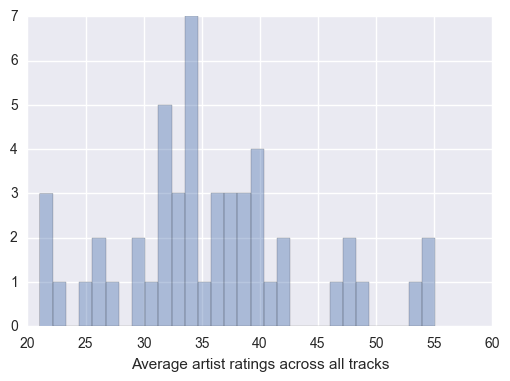

In [49]:
sns.distplot(pd.pivot_table(train, index='Artist',values=['Rating']), kde=False, bins=30, 
             axlabel='Average artist ratings across all tracks')

### Distribution of track ratings

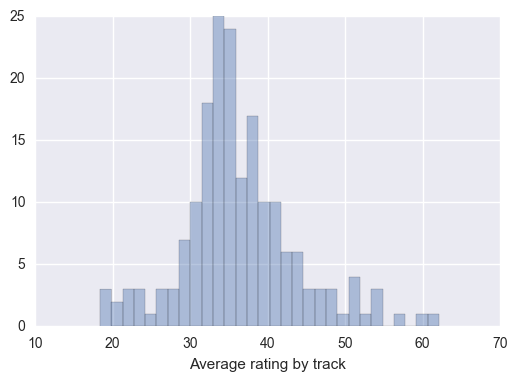

In [50]:
track_ratings = pd.pivot_table(train, index='Track',values=['Rating'])
sns.distplot(track_ratings, kde=False, bins=30, axlabel='Average rating by track')

### Comparing distributions of mean and median artist ratings

In [51]:
artists_mean = pd.pivot_table(train, index='Artist',values=['Rating'])
artists_median = pd.pivot_table(train, index='Artist',values=['Rating'],aggfunc=np.median)
scores = [artists_mean, artists_median]

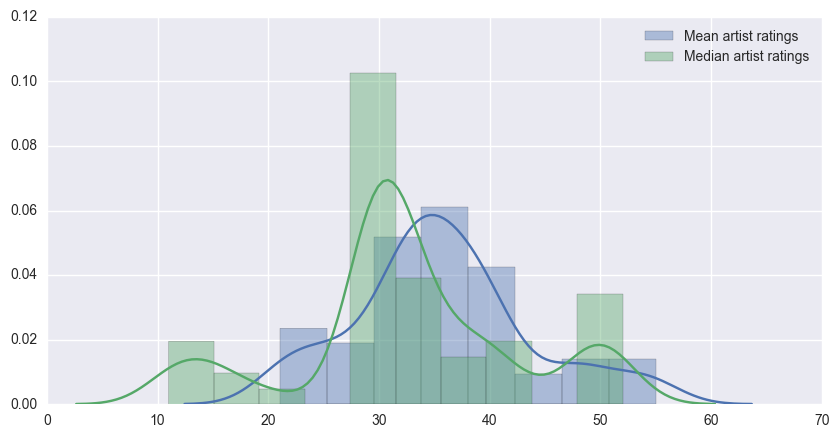

In [52]:
plt.figure(figsize=(10,5))
for i in scores:
    sns.distplot(i)

plt.legend(['Mean artist ratings','Median artist ratings'])

In [53]:
train.head(10)

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19
5,31,79,27130,37,11
6,21,48,19623,69,21
7,2,174,47505,28,17
8,12,34,15290,12,8
9,28,73,24151,70,22


In [54]:
train_sql = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv', low_memory=False)
userkey_sql = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/UserKey.csv', low_memory=False)
users_sql = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users_clean.csv', low_memory=False)
words_sql = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words_categorized.csv', low_memory=False)

In [55]:
words_sql.columns

Index([u'Unnamed: 0', u'Artist', u'User', u'HEARD_OF', u'Edgy_', u'Negative_',
       u'Sensitive_', u'Stylish_', u'Dark_', u'None_of_these_', u'Mainstream_',
       u'Iconic_', u'Playful_', u'Outdated_', u'Chill_'],
      dtype='object')

# Creating database connection and moving csv files to SQL

In [56]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://johnsnyder@localhost:5432/EMI', client_encoding='Latin1')
engine.text_factory = str
train_sql.to_sql("train", engine, if_exists='replace')
words_sql.to_sql("words", engine, if_exists='replace')
userkey_sql.to_sql("userkey", engine, if_exists='replace')
users_sql.to_sql("users", engine, if_exists='replace')


# SQL Queries

The following query combines all three tables into one. I'll then pull the table back into pandas for further revising.

```CREATE TABLE EMI AS
SELECT *
FROM train 
LEFT JOIN words 
ON train."User_tr" = words."User_wo" and train."Artist_tr" = words."Artist_wo"
LEFT JOIN users
ON train."User_tr" = users."RESPID";```

In [57]:
data = pd.read_sql('SELECT * FROM train LEFT JOIN words ON train."User" \
                    = words."User" and train."Artist" = words."Artist"\
                    LEFT JOIN users ON train."User" = users."RESPID"', engine)
data.head()

,index,Artist,Track,User,Rating,Time,index,Unnamed: 0,Artist,User,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,107,45,163,44193,82,16,97118.0,97118.0,45.0,44193.0,...,50.0,80.0,80.0,79.0,86.0,69.0,69.0,69.0,69.0,74.0
1,215,45,164,44190,89,16,22399.0,22399.0,45.0,44190.0,...,53.0,55.0,56.0,36.0,72.0,49.0,29.0,95.0,57.0,55.0
2,258,31,80,27083,11,11,85943.0,85943.0,31.0,27083.0,...,52.0,51.0,31.0,10.0,9.0,9.0,9.0,11.0,11.0,11.0
3,281,11,28,7641,41,7,43411.0,43411.0,11.0,7641.0,...,87.0,87.0,88.0,69.0,69.0,50.0,73.0,72.0,NaN,NaN
4,317,31,79,27268,30,11,84717.0,84717.0,31.0,27268.0,...,4.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,4.0,5.0


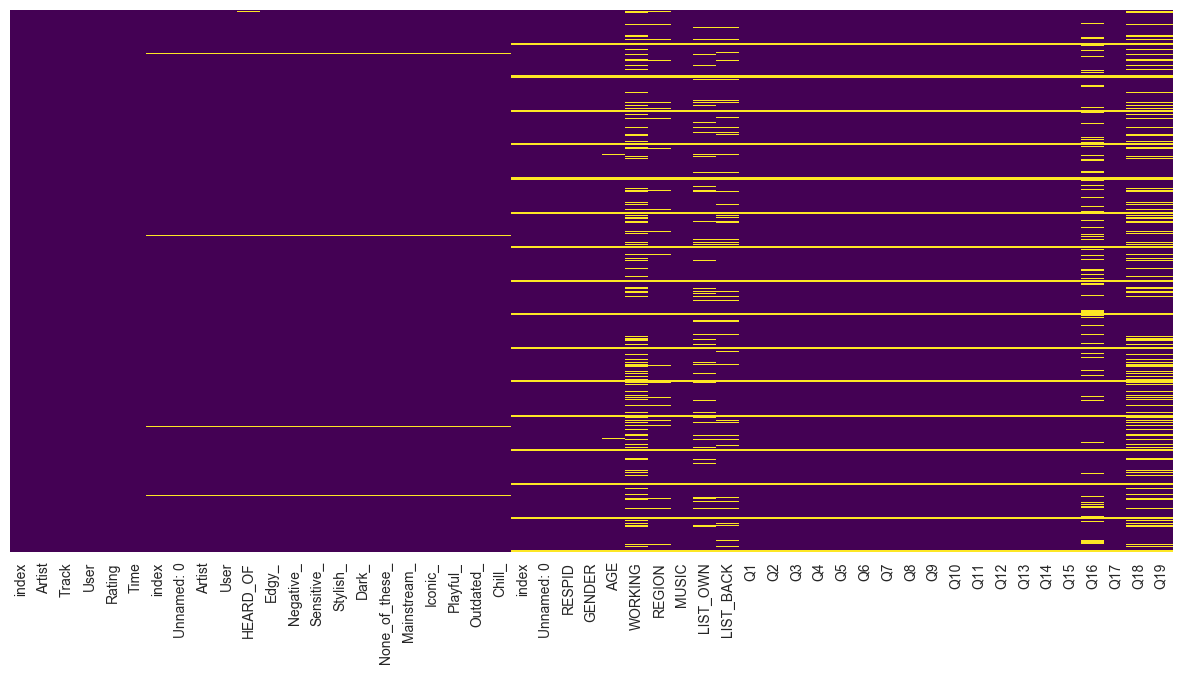

In [58]:
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [58]:
data.shape

(188690, 51)

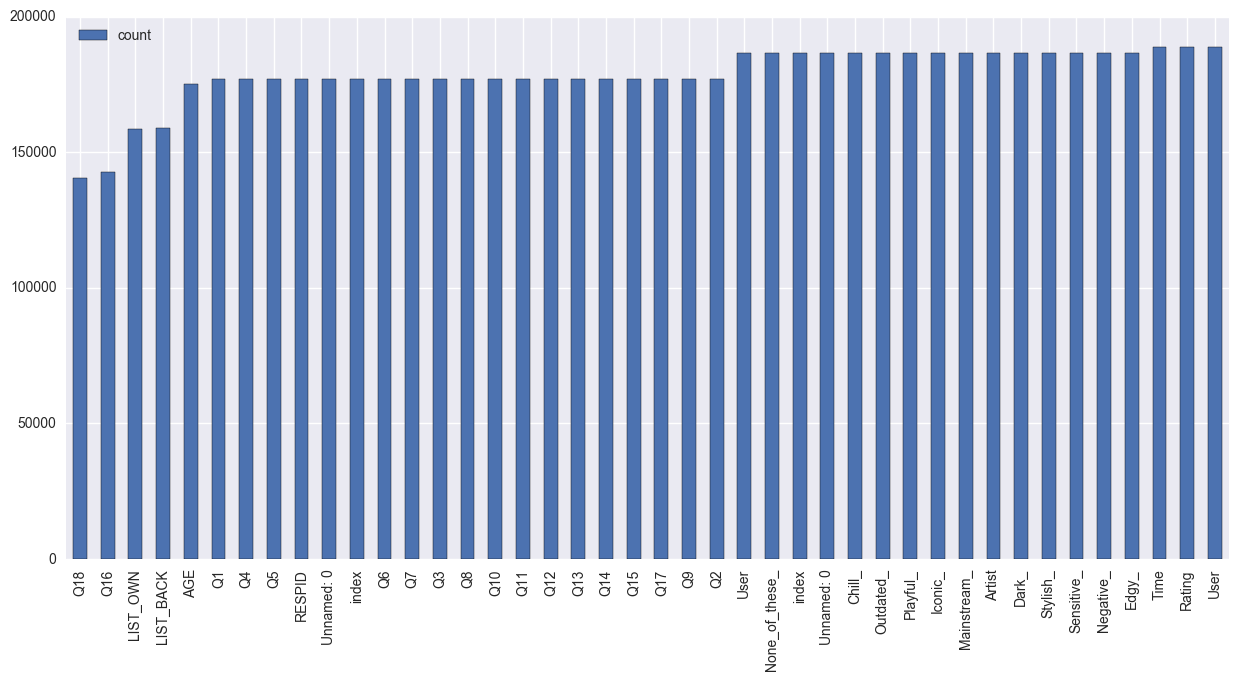

In [59]:
data_counts = data.describe()
data_counts = data_counts.iloc[0:1,3:]
data_counts = data_counts.T.sort_values('count')
data_counts = data_counts.iloc[1:,:]
data_counts.plot(kind='bar', figsize=(15,7))

#### Because Q18 and Q19 have nearly 50,000 missing data points (see below - we know that when Q18 is null, Q19 is also null), I'm going to drop these features for the sake of retaining as many data points as possible. If my model is weak, I'll return to this section and add these features back in.

In [60]:
data[data['Q18'].isnull()==True].shape

(48145, 51)

#### Interestingly enough, the same number of users who fail to report their working status also fail to report an answer to Q18, so dropping Q18 and Q19 won't help us if the 'WORKING' column remains in the dataset untouched.

In [61]:
print users[users['WORKING'].isnull()==True].shape
print users[users['Q18'].isnull()==True].shape

(13125, 27)
(13125, 27)


In [62]:
data[data['WORKING'].isnull()==True].shape

(48145, 51)

In [63]:
data_drop = data.dropna(axis=1,thresh=100000)

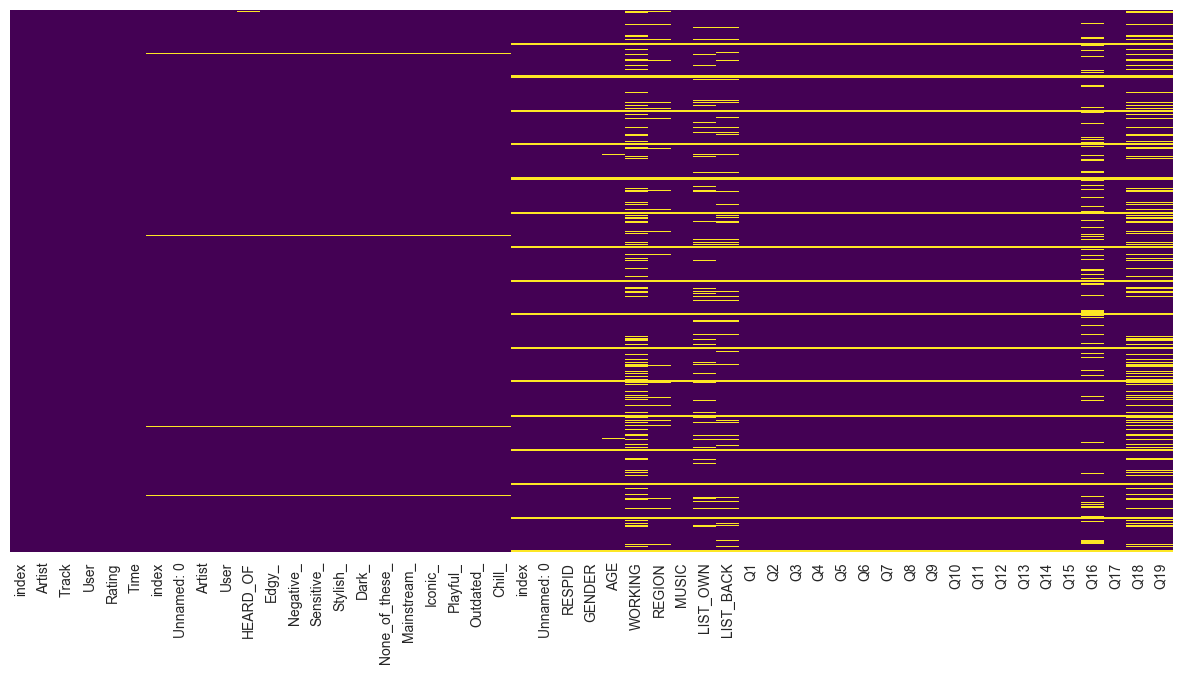

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(data_drop.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [65]:
data_drop = data_drop.drop(['Unnamed: 0'], axis=1)
data_drop = data_drop.drop(['RESPID'], axis=1)
data_drop = data_drop.drop(['Q18'], axis=1)
data_drop = data_drop.drop(['Q19'], axis=1)
data_drop = data_drop.drop(['WORKING'], axis=1)

In [66]:
data_drop.shape

(188690, 45)

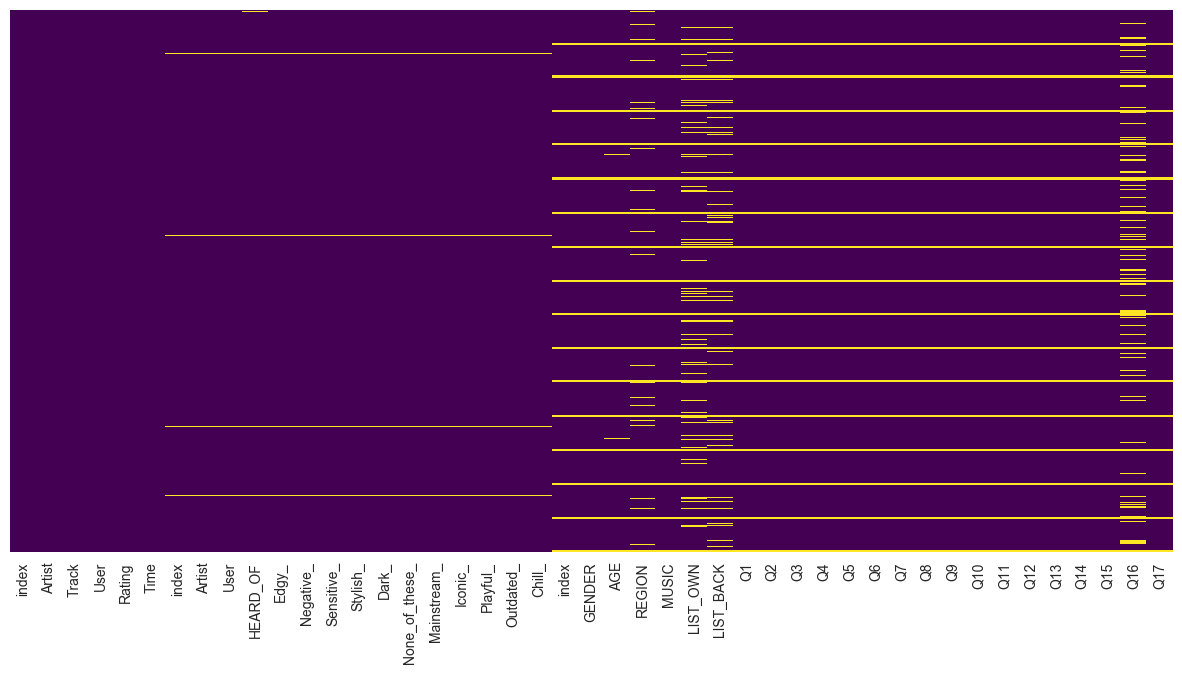

In [67]:
plt.figure(figsize=(15,7))
sns.heatmap(data_drop.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [68]:
data_clean = data_drop.dropna()

In [69]:
data_clean.shape

(111460, 45)

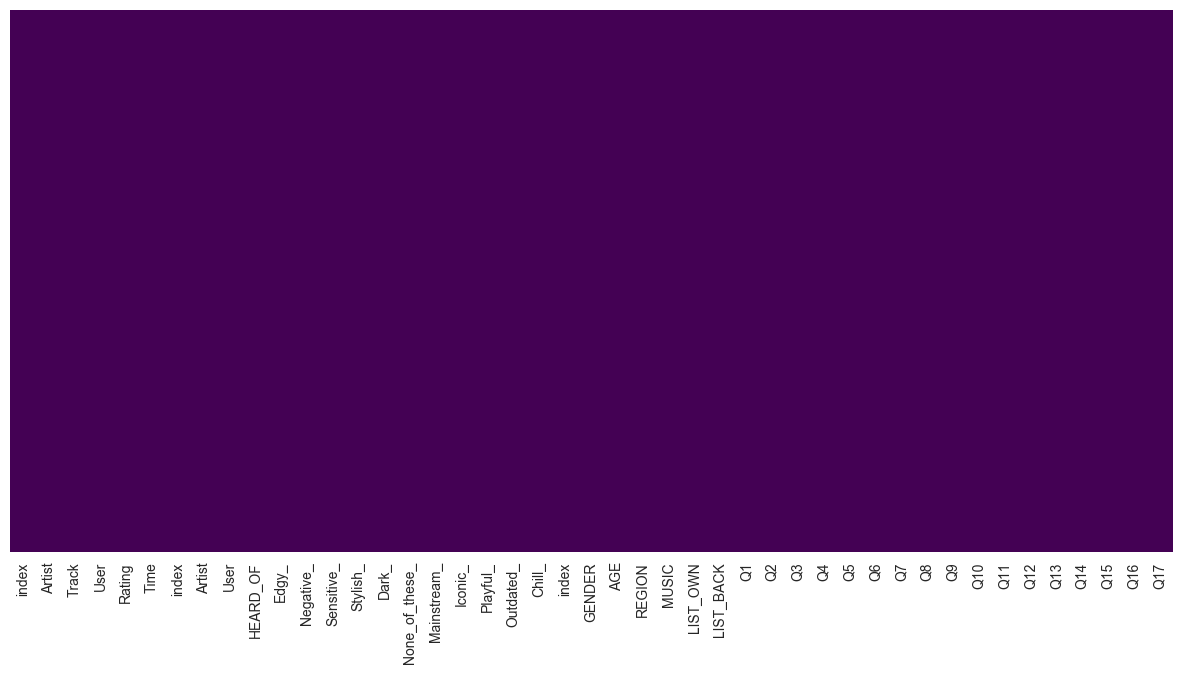

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(data_clean.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Create dummy variables, normalize data


In [71]:
data_clean.columns

Index([u'index', u'Artist', u'Track', u'User', u'Rating', u'Time', u'index',
       u'Artist', u'User', u'HEARD_OF', u'Edgy_', u'Negative_', u'Sensitive_',
       u'Stylish_', u'Dark_', u'None_of_these_', u'Mainstream_', u'Iconic_',
       u'Playful_', u'Outdated_', u'Chill_', u'index', u'GENDER', u'AGE',
       u'REGION', u'MUSIC', u'LIST_OWN', u'LIST_BACK', u'Q1', u'Q2', u'Q3',
       u'Q4', u'Q5', u'Q6', u'Q7', u'Q8', u'Q9', u'Q10', u'Q11', u'Q12',
       u'Q13', u'Q14', u'Q15', u'Q16', u'Q17'],
      dtype='object')

In [72]:
dummy_cols = ['GENDER','REGION','MUSIC']
for i in dummy_cols:
    data_clean = pd.concat([data_clean, pd.get_dummies(data_clean[i], drop_first=True)],axis=1)
    data_clean = data_clean.drop(i,axis=1)


In [73]:
data_clean.columns

Index([u'index', u'Artist', u'Track', u'User', u'Rating', u'Time', u'index',
       u'Artist', u'User', u'HEARD_OF', u'Edgy_', u'Negative_', u'Sensitive_',
       u'Stylish_', u'Dark_', u'None_of_these_', u'Mainstream_', u'Iconic_',
       u'Playful_', u'Outdated_', u'Chill_', u'index', u'AGE', u'LIST_OWN',
       u'LIST_BACK', u'Q1', u'Q2', u'Q3', u'Q4', u'Q5', u'Q6', u'Q7', u'Q8',
       u'Q9', u'Q10', u'Q11', u'Q12', u'Q13', u'Q14', u'Q15', u'Q16', u'Q17',
       u'Male', u'Midlands', u'North', u'North Ireland', u'Northern Ireland',
       u'South', u'Music has no particular interest for me',
       u'Music is important to me but not necessarily more important',
       u'Music is no longer as important as it used to be to me',
       u'Music means a lot to me and is a passion of mine'],
      dtype='object')

In [74]:
# Remove duplicate columns and reorganize
data_clean['Artist_ID'] = data_clean.iloc[:,7]
data_clean['Index'] = data_clean.iloc[:,0]
data_clean['User_ID'] = data_clean.iloc[:,8]
data_clean = data_clean.drop(['Artist', 'index', 'User'], axis=1)
cols = data_clean.columns.tolist()
cols = cols[-3:] + cols[:-3]
data_clean = data_clean.ix[:,cols]


In [75]:
header_cols = ['Artist_ID', 'Index', 'User_ID', 'Track', 'Time', 'Rating']
new_cols = header_cols + cols[6:]
data_clean = data_clean.ix[:,new_cols]
data_clean.head()

,Artist_ID,Index,User_ID,Track,Time,Rating,HEARD_OF,Edgy_,Negative_,Sensitive_,...,Male,Midlands,North,North Ireland,Northern Ireland,South,Music has no particular interest for me,Music is important to me but not necessarily more important,Music is no longer as important as it used to be to me,Music means a lot to me and is a passion of mine
0,1.0,163270,3566.0,5,18,41,Heard of,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,159391,3566.0,9,18,16,Heard of and listened to music EVER,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,144298,3566.0,4,18,44,Heard of,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.0,74698,3566.0,11,18,71,Heard of and listened to music RECENTLY,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,14.0,173934,11495.0,32,19,42,Heard of,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


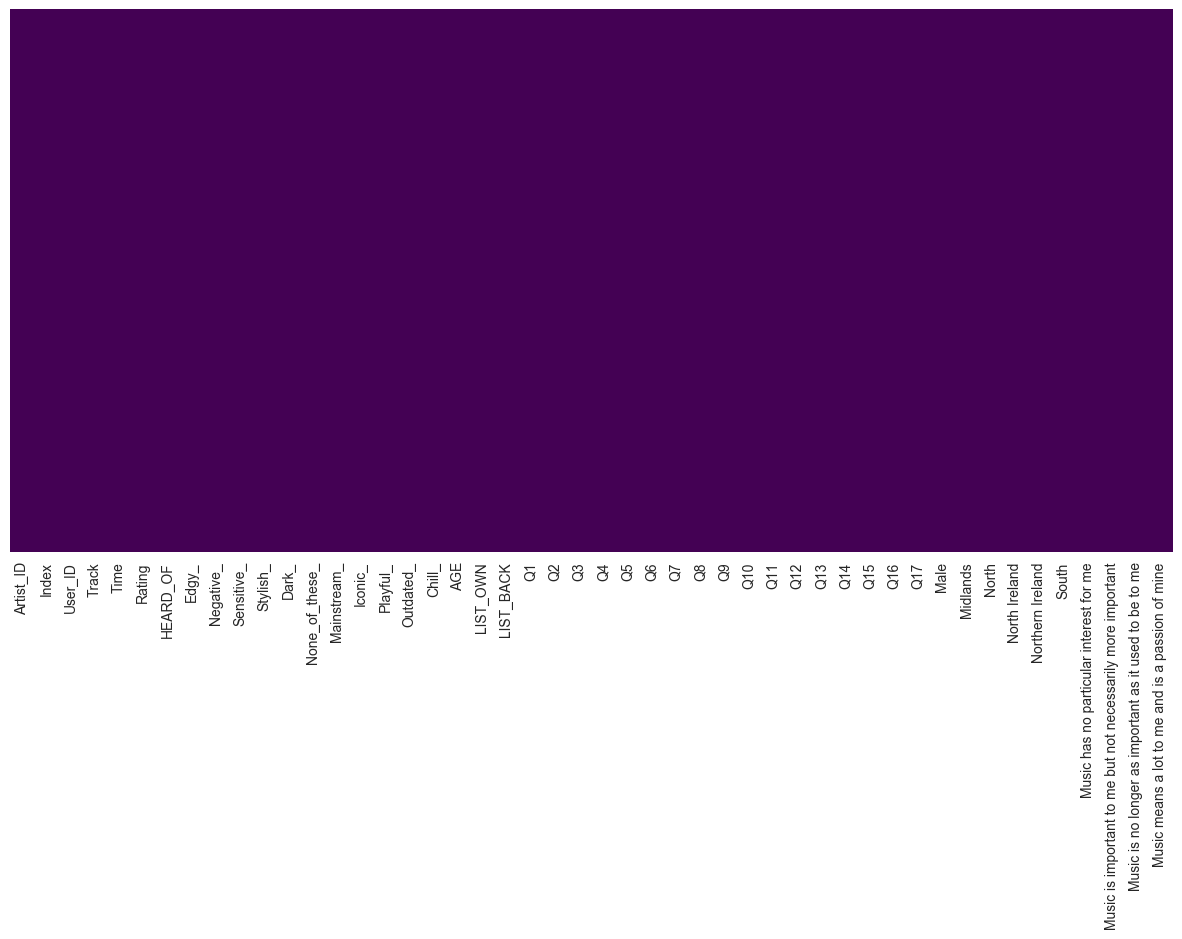

In [76]:
plt.figure(figsize=(15,7))
sns.heatmap(data_clean.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [77]:
def words_cleaner(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return None


In [78]:
data_clean.iloc[:,6:17] = data_clean.iloc[:,6:17].applymap(words_cleaner)
data_clean.head()

,Artist_ID,Index,User_ID,Track,Time,Rating,HEARD_OF,Edgy_,Negative_,Sensitive_,...,Male,Midlands,North,North Ireland,Northern Ireland,South,Music has no particular interest for me,Music is important to me but not necessarily more important,Music is no longer as important as it used to be to me,Music means a lot to me and is a passion of mine
0,1.0,163270,3566.0,5,18,41,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,159391,3566.0,9,18,16,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,144298,3566.0,4,18,44,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4.0,74698,3566.0,11,18,71,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,14.0,173934,11495.0,32,19,42,1,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
data_clean.describe()

,Artist_ID,Index,User_ID,Track,Time,Rating,HEARD_OF,Edgy_,Negative_,Sensitive_,...,Male,Midlands,North,North Ireland,Northern Ireland,South,Music has no particular interest for me,Music is important to me but not necessarily more important,Music is no longer as important as it used to be to me,Music means a lot to me and is a passion of mine
count,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.0,111460.000000,111460.000000,111460.000000,...,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000,111460.000000
mean,21.011601,94144.190544,26927.849937,89.477086,15.012273,37.392661,1.0,0.176924,0.268329,0.403032,...,0.500592,0.269325,0.352557,0.002090,0.017432,0.321649,0.017791,0.399336,0.028710,0.329105
std,15.687981,54471.406761,15746.837837,65.008561,4.535960,22.889588,0.0,0.381606,0.443092,0.490509,...,0.500002,0.443611,0.477768,0.045674,0.130876,0.467111,0.132192,0.489764,0.166991,0.469890
min,0.000000,0.000000,3.000000,0.000000,4.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,47108.750000,12878.000000,27.000000,12.000000,16.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,93961.500000,27025.000000,79.000000,16.000000,33.000000,1.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,141334.500000,41431.000000,156.000000,18.000000,51.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,49.000000,188689.000000,50927.000000,183.000000,21.000000,100.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
data_clean.to_csv(path_or_buf='/Users/johnsnyder/GA-DSI-working/Capstone/EMI/clean_data.csv')

## Data problem, and solution, explained
Originally, there were a slew of null values in the dataset. Due to some mismatches in the dataset - for example, some interviews gave a different list of words to respondents, and some respondent ID numbers do not match up with ID numbers in the training data set - if we simply drop any rows with null values, we lose the *entire* data set. In other words, every row of data contains at least one null value. I categorized the 82 words given in the 'words.csv' file into 11 categories, removed some columns with too many null values, and chiseled down the dataset to have no null values. Without categorizing the words.csv file, the dataset goes from about 188,000 rows of data to 37,000. Ouch. By categorizing the words, and dropping some of the questionnaire elements, we retain nearly 111,500 datapoints. Obviously this is a still a major reduction from what we originally had, but is a major improvement from before!

Let's quickly take a closer look at what values have been lost through data cleaning and mismatches in the dataset...

In [81]:
# Comparing number of unique users in the "users.csv" file compared to unique users in the "words.csv" file.
lstU = users.RESPID.unique()
lstW = words.User.unique()
user_test = []
for x in lstW:
    if x in lstU:
        pass
    else:
        user_test.append(x)
        
print "Difference in total unique users between Users and Words datasets: ", len(user_test)
print "Users (users.csv): ", len(lstU)
print "Users (words.csv): ", len(lstW)

Difference in total unique users between Users and Words datasets:  2283
Users (users.csv):  48645
Users (words.csv):  50928


In [82]:
# Comparing number of unique artists in the "users.csv" file compared to unique artists in the "train.csv" file.
ArtW = words.Artist.unique()
ArtT = train.Artist.unique()
art_test = []
for x in ArtW:
    if x in ArtT:
        pass
    else:
        art_test.append(x)
        
print "Total unique artists lost: ", len(art_test)
print "Artists (words.csv): ", len(ArtW)
print "Artists (train.csv): ", len(ArtT)

Total unique artists lost:  0
Artists (words.csv):  50
Artists (train.csv):  50


In [83]:
# Looking into the values we dropped due to missing necessary values
null_data = data_drop[data_drop.isnull().any(axis=1)]
print null_data.shape
null_data.head()

(77230, 45)


,index,Artist,Track,User,Rating,Time,index,Artist,User,HEARD_OF,...,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
11,165221,6,149,38548,18,15,NaN,NaN,NaN,None,...,2.0,82.0,3.0,20.0,7.0,6.0,7.0,4.0,3.0,3.0
12,157103,6,148,38548,13,15,NaN,NaN,NaN,None,...,2.0,82.0,3.0,20.0,7.0,6.0,7.0,4.0,3.0,3.0
15,172012,3,9,4203,37,18,38912.0,3.0,4203.0,Never heard of,...,10.0,68.0,10.0,27.0,47.0,48.0,49.0,15.0,13.0,14.0
16,61085,2,7,4203,34,18,66179.0,2.0,4203.0,Never heard of,...,10.0,68.0,10.0,27.0,47.0,48.0,49.0,15.0,13.0,14.0
17,140673,4,12,4203,70,18,109890.0,4.0,4203.0,Heard of,...,10.0,68.0,10.0,27.0,47.0,48.0,49.0,15.0,13.0,14.0


In [84]:
# Comparing number of artists in the "words.csv" file with those in the null dataset
ArtW = words.Artist.unique()
Artnull = pd.concat((null_data.Artist.ix[:,0],null_data.Artist.ix[:,1]), axis=0).unique()
artnulltest = []
for x in Artnull:
    if x in data_clean.Artist_ID.unique():
        pass
    else:
        artnulltest.append(x)
        
print "Number of missing artists (exluding null): ", len(artnulltest)-1
print "'Null' data artists: ", artnulltest
print "Clean data artists: ", data_clean.Artist_ID.unique()
print "Remaining number of artists (excluding null): ", len(ArtW) - len(artnulltest)+1
print "Test - remaining number of artists in data_clean: ", len(data_clean.Artist_ID.unique())
print "Remaining percentage of artists: {}%".format(100.*(len(data_clean.Artist_ID.unique())) / len(ArtT))

Number of missing artists (exluding null):  11
'Null' data artists:  [36.0, 38.0, 30.0, 35.0, 34.0, 26.0, 39.0, 29.0, 27.0, 37.0, 28.0, nan]
Clean data artists:  [  1.   3.   4.  14.  20.  25.  21.  11.  33.  32.  31.   0.   7.   6.  44.
  43.  42.  40.  49.  41.  15.  13.  47.  24.  22.   2.   9.   5.  23.  10.
  46.  45.  48.  16.  12.   8.  17.  19.  18.]
Remaining number of artists (excluding null):  39
Test - remaining number of artists in data_clean:  39
Remaining percentage of artists: 78.0%


In [85]:
# Checking if any artists in the null dataset appear in the clean dataset
duplicates = []
for x in artnulltest:
    if x in data_clean.Artist_ID.unique():
        duplicates.append(x)
    else:
        pass
duplicates

[]

In [86]:
# Observing how many unique users are excluded from the final dataset
included = []
excluded = []
for i in pd.concat((null_data.User.ix[:,0],null_data.User.ix[:,1]), axis=0).unique():
    try:
        if i in data_clean.User_ID:
            included.append(i)
        else:
            excluded.append(i)
    except:
        print "Not included: ", i
        
for y in included:
    if y in excluded:
        print "Overlap: ", y
    else:
        pass

print "# of users in null data set included in clean dataset: {:,}".format(len(included))
print "# of users in null data set excluded in clean dataset: {:,}".format(len(excluded))

Not included:  nan
# of users in null data set included in clean dataset: 10,555
# of users in null data set excluded in clean dataset: 7,590


In [87]:
print "Total number of unique users: {:,}".format(pd.concat((users.RESPID, words.User, train.User), axis = 0).nunique())
print "Total number of unique users (respondent background info): {:,}".format(users.RESPID.nunique())
print "Total number of unique users after data clean: {:,}".format(data_clean.User_ID.nunique())
print "% of original users remaining: {0:.2f}%".format(100*float(data_clean.User_ID.nunique()) /\
                                        pd.concat((users.RESPID, words.User, train.User), axis = 0).nunique())

Total number of unique users: 50,928
Total number of unique users (respondent background info): 48,645
Total number of unique users after data clean: 32,590
% of original users remaining: 63.99%


## OK, so...

The above check shows that 11 artists and about 36% of users were removed through the process of removing null values to obtain a clean dataset.

Given previous iterations of cleaning this dataset, this isn't half bad (maybe ~1/3 bad?). If my model doesn't work well given the features I have in the the clean dataset, I'll return to this process and add some features back in.